   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

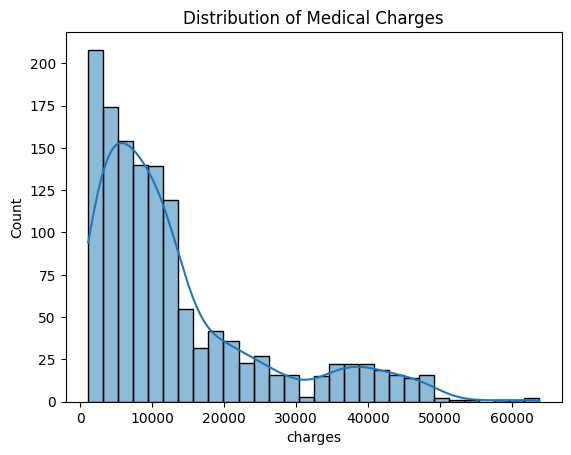

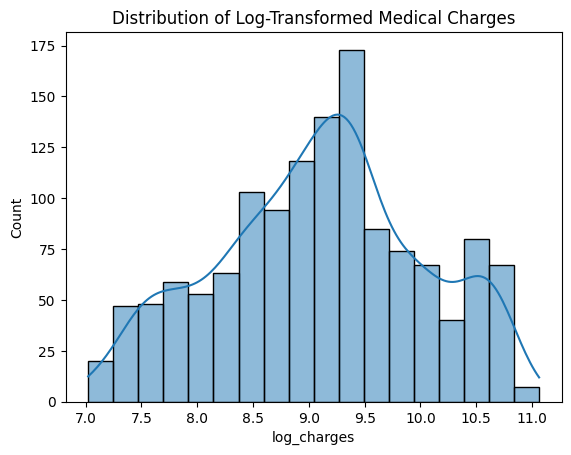

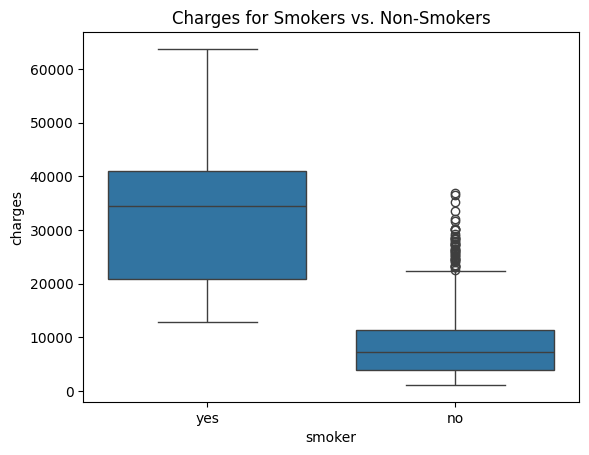

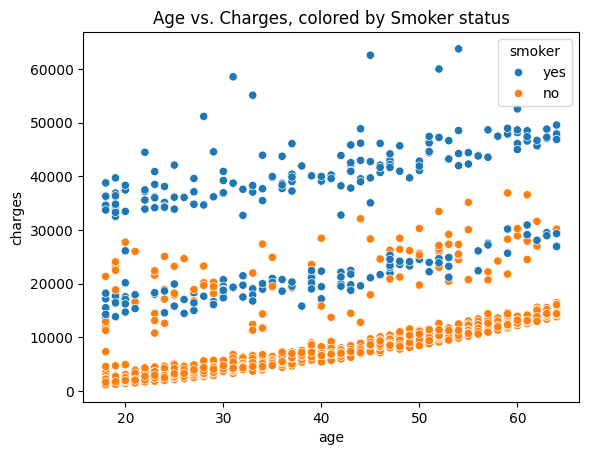

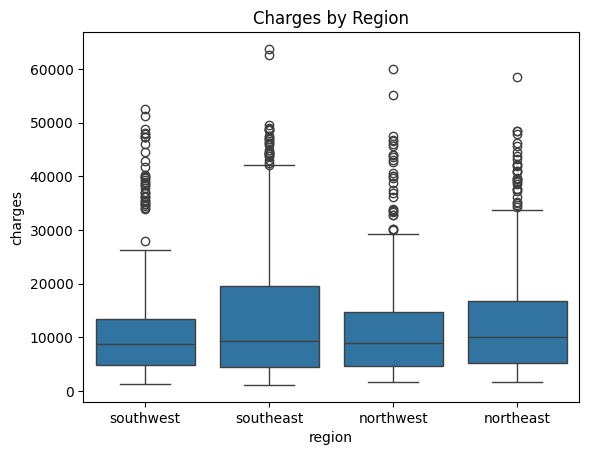

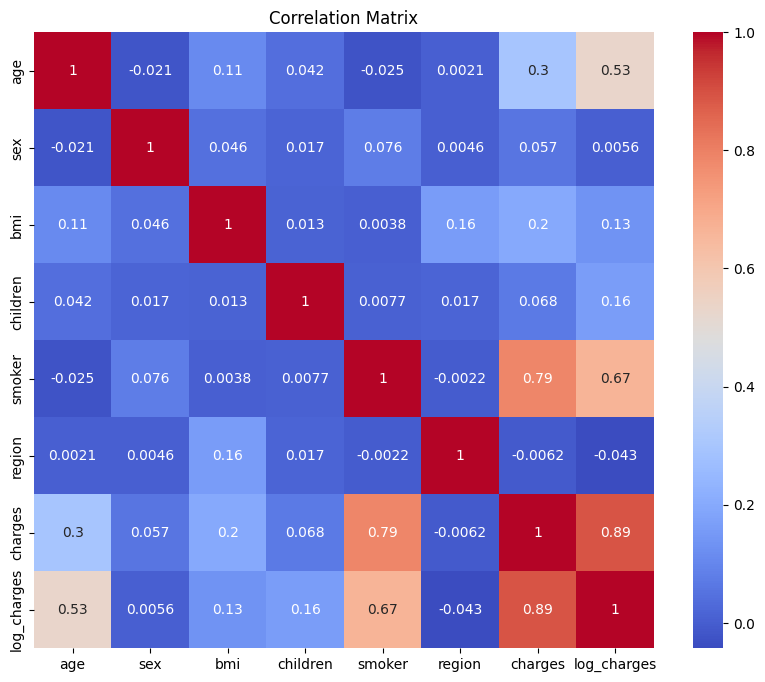

In [4]:
# In eda.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('insurance.csv')

# 1. Initial Inspection
print(df.head())
print(df.info()) # Check for null values and data types
print(df.describe()) # Get statistical summary of numerical columns

# 2. Target Variable Analysis
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Medical Charges')
plt.show()
# Observation: The data is heavily skewed to the right. Many people have low costs, a few have very high costs. A log transformation might be useful.
df['log_charges'] = np.log1p(df['charges'])
sns.histplot(df['log_charges'], kde=True)
plt.title('Distribution of Log-Transformed Medical Charges')
plt.show()


# 3. Explore Relationships (Bivariate Analysis)
# Smoker vs. Charges
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges for Smokers vs. Non-Smokers')
plt.show() # Observation: Smokers have significantly higher charges. This is a very strong predictor.

# Age vs. Charges
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Age vs. Charges, colored by Smoker status')
plt.show() # Observation: Charges increase with age. There are distinct clusters for smokers and non-smokers.

# Region vs. Charges
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.show()

# 4. Correlation Heatmap
# First, convert categorical variables to numeric for the heatmap
corr_df = df.copy()
corr_df['sex'] = corr_df['sex'].astype('category').cat.codes
corr_df['smoker'] = corr_df['smoker'].astype('category').cat.codes
corr_df['region'] = corr_df['region'].astype('category').cat.codes

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()